# Zero to Hero

## 1.08 Unos buenos hiperparametros

Se aplicará el modelo generado por rpart a los datos nuevos y se genera la salida para Kaggle

In [1]:
rm( list=ls())
gc()

library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart
library( "rpart.plot")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,474654,25.4,1045198,55.9,621911,33.3
Vcells,875656,6.7,8388608,64.0,1601572,12.3


Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'rpart' was built under R version 3.6.3"

In [2]:
options(repr.plot.width=20, repr.plot.height=10) 
setwd("C:\\Users\\oliva\\OneDrive\\Desktop\\DS\\Austral\\08 - Labo1") #Aqui se debe poner la ruta de la PC local

In [4]:
dtrain <- data.table::fread("./labo/datasets/paquete_premium_202011.csv")   #cargo el dataset

Defino unos parametros interesantes
<br>
los hiperparametros van en una lista
<br>
notar la forma en que esos parametros se pasan a la funcion rpart

Pequeña explicación de cara hiperparametro: https://stat.ethz.ch/R-manual/R-devel/library/rpart/html/rpart.control.html

In [5]:

param  <- list("cp"= -0.5, #complejidad
               "minsplit"=  900, 
               "minbucket"= 440,
               "maxdepth"= 5
              )

In [6]:
#genero el modelo
modelo <-  rpart::rpart(formula= "clase_ternaria ~ ." ,
                        data= dtrain,
                        xval= 0,
                        control= param)

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"Warning message:
"cex and tweak both specified, applying both"

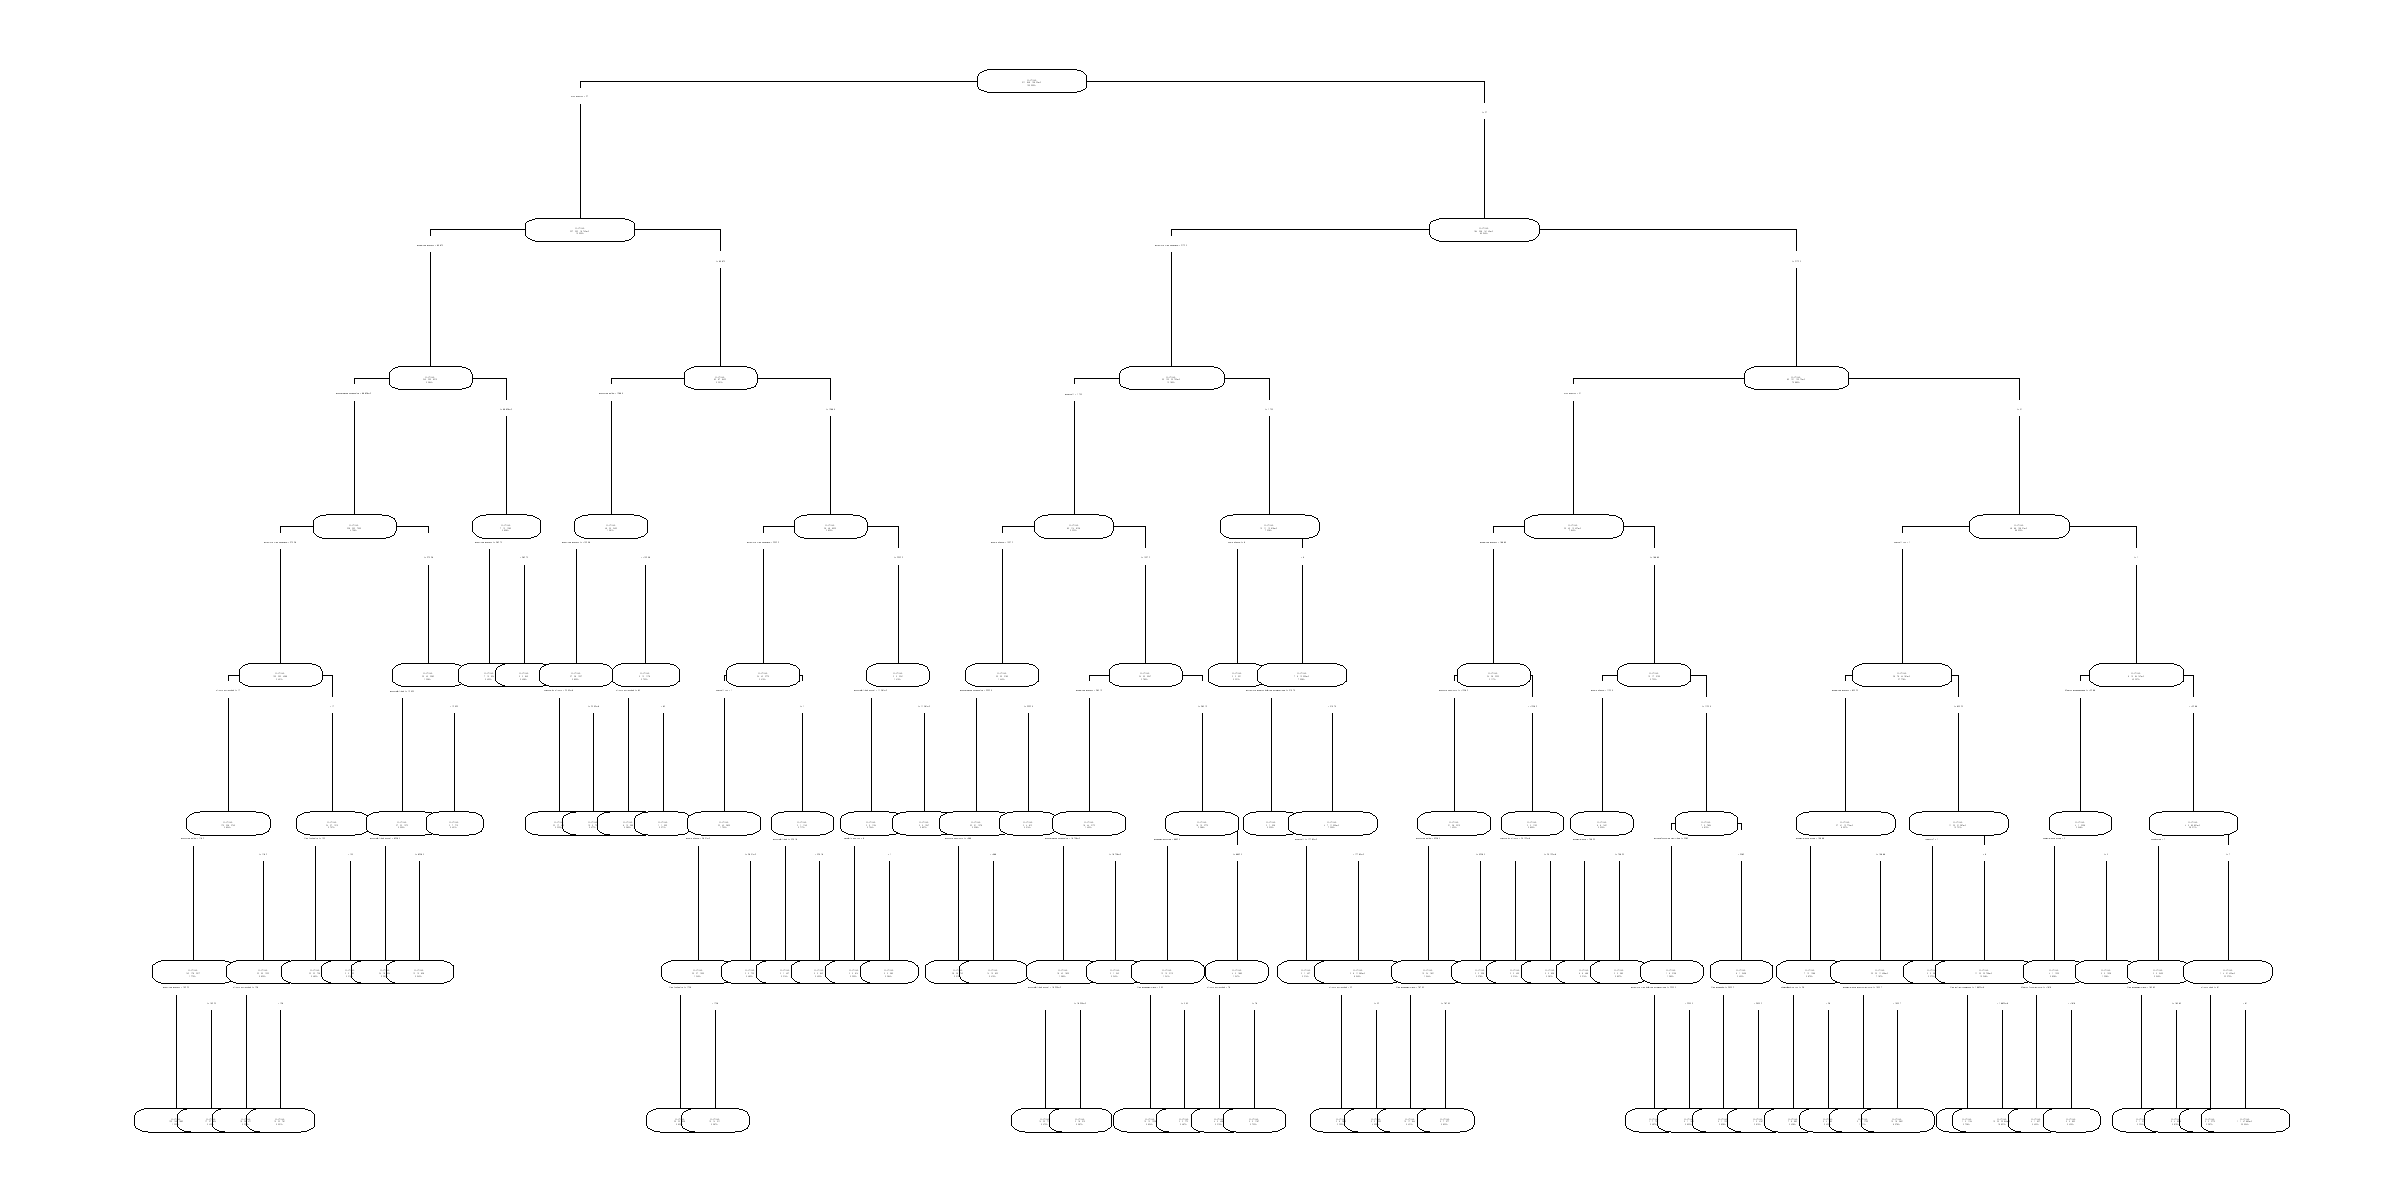

In [25]:
#grafico
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=0.10)

Cargo el dataset a donde voy a aplicar el modelo

In [8]:
dapply <- data.table::fread("./labo/datasets/paquete_premium_202101.csv")   #cargo el dataset

Aplico el modelo a los datos dapply  pidiendo que me devuelva probabildades

In [9]:
prediccion  <- predict( modelo, dapply, type = "prob")

Genero la salida

In [10]:
prob_baja2  <- prediccion[, "BAJA+2"]
Predicted   <- ifelse( prob_baja2 > 1/60, 1, 0 )

entrega  <-  as.data.table( list( "numero_de_cliente"=dapply$numero_de_cliente, "Predicted"=Predicted)  )

#creo la carpeta donde va el experimento
dir.create( "./labo/exp/",  showWarnings = FALSE ) 
dir.create( "./labo/exp/ZH2018/", showWarnings = FALSE )

#genero el archivo para Kaggle
fwrite( entrega, 
        file= "./labo/exp/ZH2018/para_Kaggle_0108.csv",
        sep=  "," )

Subiendo a Kaggle la prediccion anterior se obtiene en el Public Leaderboard 15.64970